In [276]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
%matplotlib inline

In [277]:
#read the data
df = pd.read_csv('datasets/listings_clean.csv')
print(df.columns.values)
df.head()

['name' 'host_name' 'host_since' 'street' 'neighbourhood_cleansed' 'city'
 'zipcode' 'latitude' 'longitude' 'is_location_exact' 'property_type'
 'room_type' 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type'
 'square_feet' 'price' 'weekly_price' 'monthly_price' 'guests_included'
 'extra_people' 'minimum_nights' 'maximum_nights' 'calendar_updated'
 'availability_30' 'availability_60' 'availability_90' 'availability_365'
 'number_of_reviews' 'first_review' 'last_review' 'review_scores_rating'
 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value' 'host_listing_count']


,name,host_name,host_since,street,neighbourhood_cleansed,city,zipcode,latitude,longitude,is_location_exact,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count
0,Stay like a real New Yorker!,Michael,2013-04-10,"East 53rd Street, New York, NY 10022, United S...",Midtown East,New York,10022,40.756852,-73.964754,t,...,2013-04-28,2014-12-17,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1
1,Apartment 20 Minutes Times Square,Denise,2012-06-13,"West 155th Street, New York, NY, United States",Hamilton Heights,New York,NaN,40.830599,-73.941014,f,...,2014-01-05,2014-12-29,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2
2,Option of 2 Beds w Private Bathroom,Miao,2013-01-05,"Van Buren Street, Brooklyn, NY 11221, United S...",Bushwick,Brooklyn,11221,40.692189,-73.924120,t,...,2014-02-04,2014-12-29,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4
3,Charming Bright West Village Studio,Sara,2010-08-11,"Greenwich Ave, New York, NY 10011, United States",West Village,New York,10011,40.734751,-74.002592,t,...,2010-10-08,2014-10-30,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1
4,Charming Apartment in Chelsea,Charles,2014-10-15,"West 22nd Street, New York, NY 10011, United S...",Chelsea,New York,10011,40.745282,-73.997836,t,...,2014-12-08,2014-12-08,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1


In [278]:
n = df.shape[0]
print(n)

#extract the columns involved with ratings
#draw heatmap 
data = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
          'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
          'review_scores_value','price']]

data.head()

27392


,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,160
1,85.0,8.0,8.0,9.0,8.0,7.0,8.0,105
2,98.0,10.0,10.0,10.0,10.0,9.0,10.0,58
3,96.0,10.0,9.0,10.0,10.0,10.0,9.0,185
4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,195


In [279]:
#clean data
#remove the row if any field is nan
cleaned_data = data
for i in range(data.shape[1]):
    cleaned_data = cleaned_data[pd.notnull(cleaned_data.iloc[:,i])]
n = cleaned_data.shape[0]
print(n)

18615


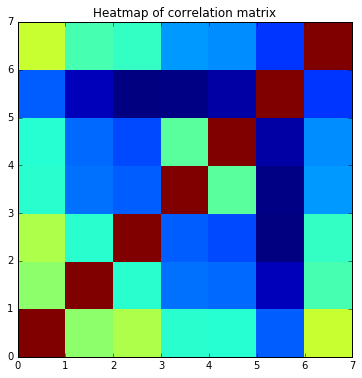

In [280]:
#convert to numpy array
x = cleaned_data.iloc[:,:-1].values
y = cleaned_data.iloc[:,-1].values

# Compute matrix of correlation coefficients
corr_matrix = np.corrcoef(x.T)

# Display heat map 
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.pcolor(corr_matrix)

ax.set_title('Heatmap of correlation matrix')

plt.show()

We could see that these factors are all independent.

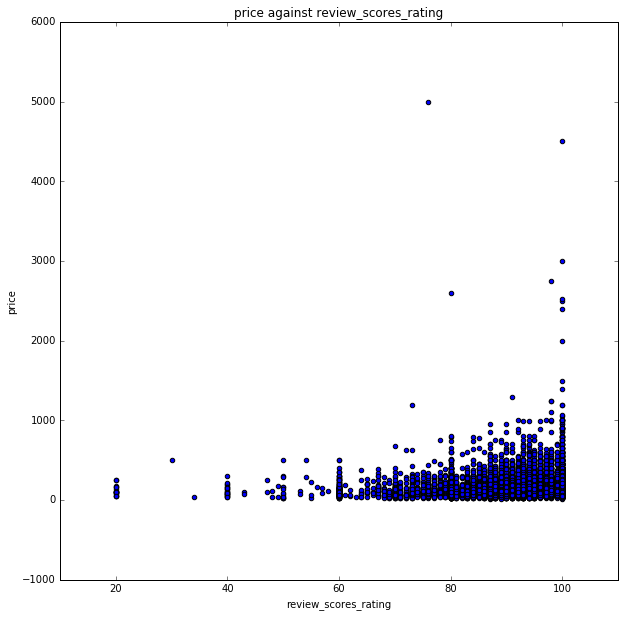

In [281]:
#scatter plot of ratings and price
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(x[:, 0], y)
ax.set_xlabel('review_scores_rating')
ax.set_ylabel('price')
ax.set_title('price against review_scores_rating')
plt.show()

Apparently there are some extreme value of prices. The abnormal values disturbs our observations, so we constrin the range of price into a reasonable interval.

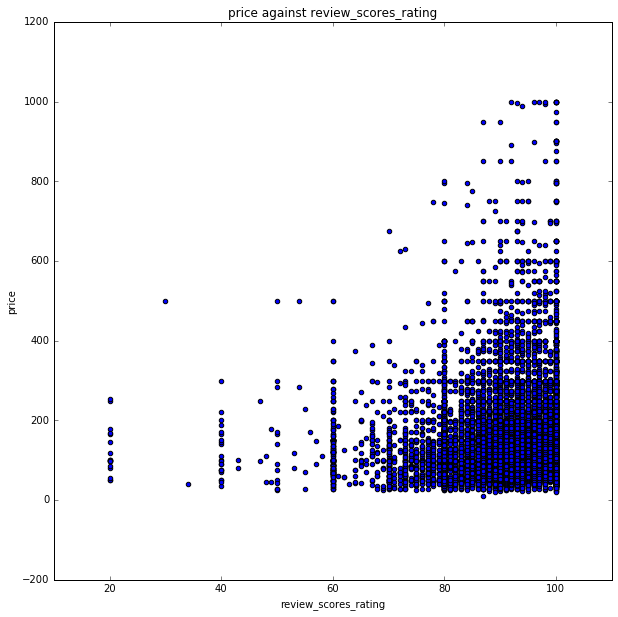

In [282]:
index = y<=1000
new_y=y[index]
new_x=x[index]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(new_x[:, 0],new_y)
ax.set_xlabel('review_scores_rating')
ax.set_ylabel('price')
ax.set_title('price against review_scores_rating')
plt.show()

Now we could clearly see that most ratings are between 70 and 100. The low prices(under 100 dollors) exsit in nearly all possible ratings. But with the increase of rating, the potential of being high priced is gradually growing, and hence the range of the price expands, including low prices and some relatively high prices.

Now let's see the distribution of prices:

18595
('mean', 151.10282333960743)


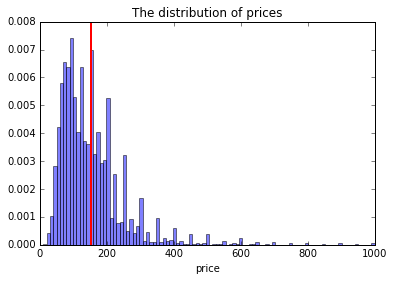

In [289]:
from scipy import stats
print(new_y.shape[0])
plt.hist(new_y, bins=100, color='blue', alpha=0.5, normed=1)
mean = np.mean(new_y)
print("mean",mean)
plt.axvline(x=mean, linewidth=2, color='red' )
plt.title("The distribution of prices")
plt.xlabel("price")
plt.show()


('mean', 92.235439634310296)


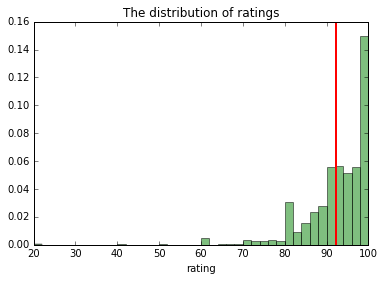

In [290]:
#scatter plot of ratings
plt.hist(new_x[:,0], bins=40, color='green',alpha=0.5, normed=1)
mean = np.mean(new_x[:,0])
print("mean",mean)
plt.axvline(x=mean, linewidth=2, color='red' )
plt.title("The distribution of ratings")
plt.xlabel("rating")
plt.show()

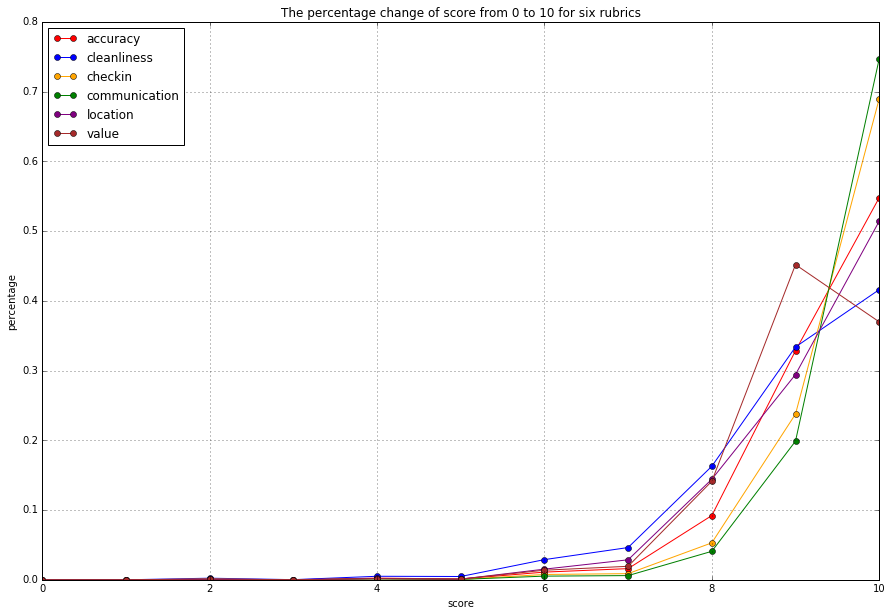

In [293]:
colors =['red','blue', 'orange', 'green', 'purple', 'brown']
names = ['accuracy', 'cleanliness','checkin', 'communication', 'location', 'value']

n = new_x.shape[0]
plt.figure(figsize=(15,10))

for i in range(6):
    plt.plot(np.bincount(np.int_(new_x[:,i+1]))/float(n), marker='o', color=colors[i], 
             label=names[i])
    
plt.xlabel('score'); 
plt.ylabel('percentage')
plt.title("The percentage change of score from 0 to 10 for six rubrics")
plt.legend(loc='best')
plt.grid()
plt.show()

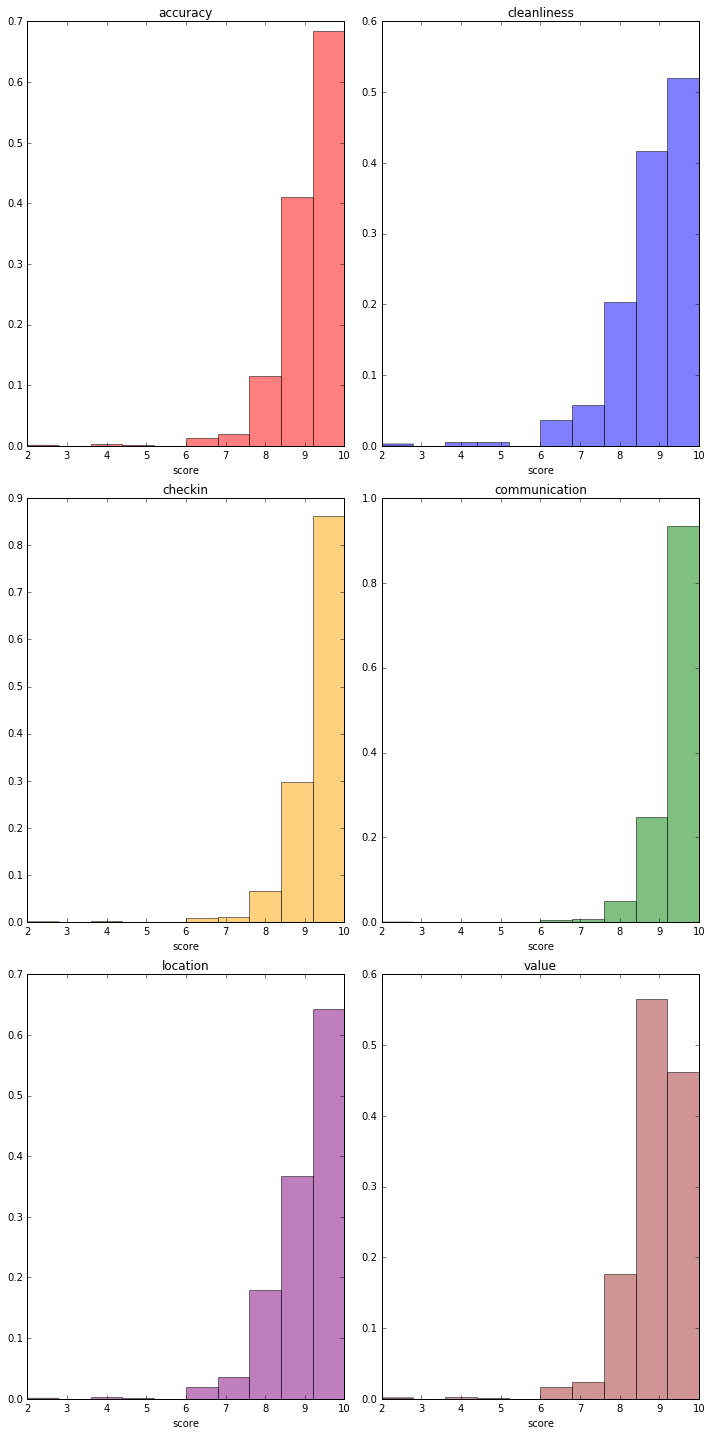

In [304]:
fig, ax = plt.subplots(3, 2, figsize=(10, 20))


for i in range(3):
    for j in range(2):
        k=i*2+j
        ax[i,j].hist(new_x[:,k+1], color=colors[k], alpha=0.5, normed=1)
        ax[i,j].set_title(names[k])
        ax[i,j].set_xlabel('score')
        
plt.tight_layout()
plt.show()

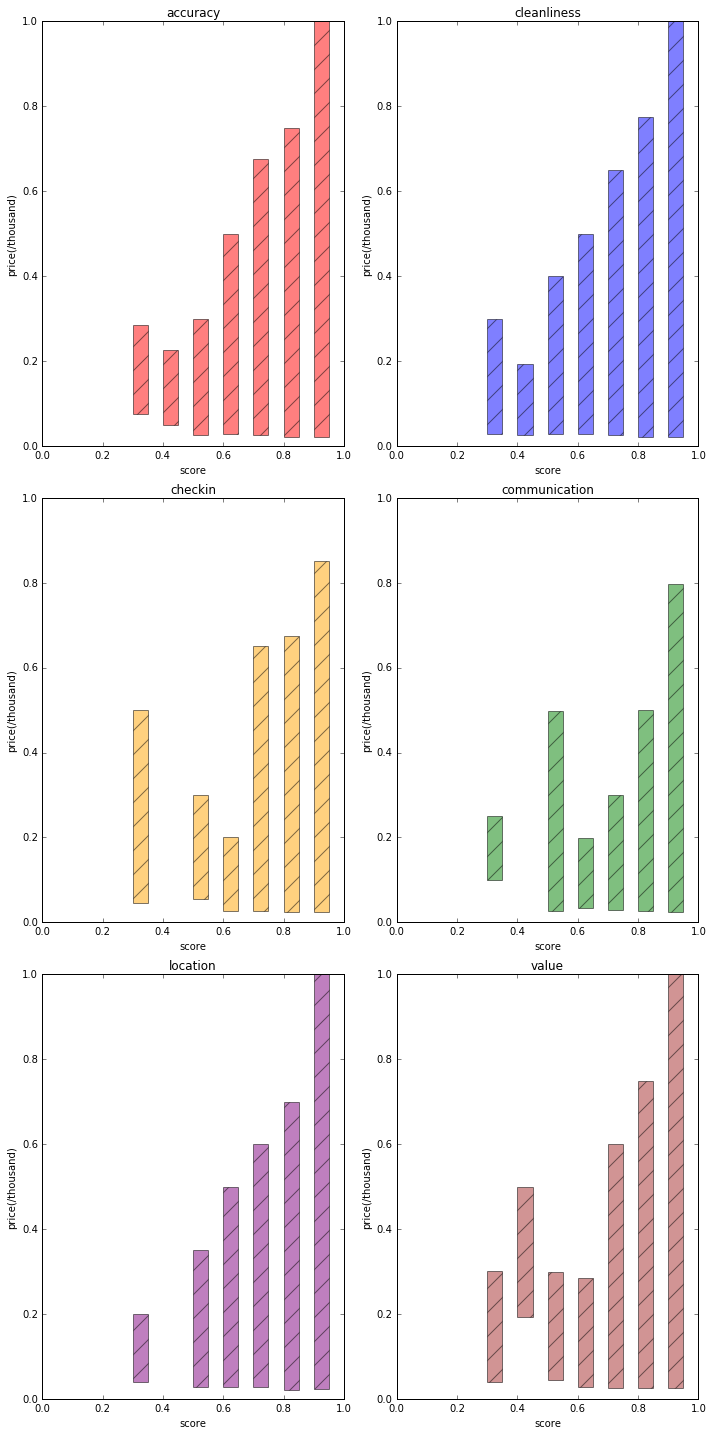

In [305]:
import matplotlib.patches as patches
fig, ax = plt.subplots(3, 2, figsize=(10, 20))

def plotit(k, ax):
    ds = pd.DataFrame({'x': new_x[:,k+1], 'y': new_y})
    s=[]
    for i in range(10):
        temp=ds[ds.x==i]
        high = 0
        low = 0
        if not math.isnan(np.max(temp)[1]):
            high=np.max(temp)[1]
        if not math.isnan(np.min(temp)[1]):
            low=np.min(temp)[1]   
        s.append({'high': high, 'low':low})

    for i in range(10):
        p = patches.Rectangle(
            (0.1+i*0.1, s[i]['low']/1000), 0.05, (s[i]['high']-s[i]['low'])/1000,
            hatch='/', facecolor=colors[k], alpha = 0.5
        )

        ax.add_patch(p)
        ax.set_xlabel('score')
        ax.set_ylabel('price(/thousand)')
        ax.set_title(names[k])
        

for i in range(3):
    for j in range(2):
        k=i*2+j
        plotit(k, ax[i,j])
        
plt.tight_layout()
plt.show() 